# Varilog

The documentation and examples contained in this notebook detail the Python API for the **Varilog**. That Python package is called *varilog* (lowercase 'v') for obvious reasons.

For more information concerning the **Varilog** and its associated components and tools, refer to the [Varilog website][1]. The project and its (open) source code is [hosted on Github][2].

  [1]: http://chernals.github.io/varilog/
  [2]: https://github.com/chernals/varilog

## Required Python imports and Jupyter magic commands

In [12]:
# Makes the tab-completion more efficient
%config IPCompleter.greedy=True
# For development only
%reload_ext autoreload
%autoreload 2

In [4]:
# In the end this is as simple as...
import varilog as vrl

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Exploring the available MD's and tags

**The main object of the Python API is** *vrl.MD.*

It provides access to lists of available MD's:

In [4]:
vrl.MD.names

['mte2015_optim', 'leir2015_test']

In case you want to update the list (for example after having created a new MD with the CLI):

In [5]:
vrl.MD.names.update()

['mte2015_optim', 'leir2015_test']

Note also that *vrl.MD.names* contains attributes that are representations of the MD names (try this out with tab-completion: *vrl.MD.names.<TAB>* :

In [6]:
vrl.MD.names.leir2015_test

leir2015_test

Each MD name in turn gives access to its *tags*:

In [7]:
vrl.MD.names.leir2015_test.tags

['tag1_0']

and also in the form of attribute representation (the actual tag name is prefixed with 'tag' as tags are usually numbers):

In [8]:
vrl.MD.names.leir2015_test.tag1_0

'1.0'

## Finding your MD: where the real fun starts

*vrl.MD* objects are constructed with only two arguments: the name and the tag:

In [42]:
mdleir = vrl.MD('leir2015_test', '1.0')

MD found with 1 cycles and 46 devices.


This can also be done using the completion and the attributes:

In [51]:
mdmte = vrl.MD(vrl.MD.names.mte2015_optim, vrl.MD.names.mte2015_optim.tag1_0)

MD found with 1002 cycles and 63 devices.


Invalid names or tags are detected:

In [45]:
mdunknown = vrl.MD('nonexistant', '???')
print(type(mdunknown))

MD name not found.
<class 'NoneType'>


In [50]:
mdunknown = vrl.MD(vrl.MD.names.mte2015_optim, '???')
print(type(mdunknown))

Tag not found for the MD.
<class 'NoneType'>


## Exploring the data of your MD

In [4]:
mymd = vrl.MD(vrl.MD.names.mte2015_optim, '2.0')

MD found with 1002 cycles and 63 devices.


Your MD object knows about the MD metadata!

In [5]:
mymd.users

['chernals', 'sterbini']

In [6]:
mymd.comment

'Optimization tests'

And the MD object is aware of the parameters (Device/Property#field) attached to it. And as an added bonus you have autocompletion. The type of each parameter is provided.

In [11]:
mymd.devices['F16_BCT203']['Sampler']

{'aqnstamp': 'scalar',
 'dataUnit': 'str',
 'dataUnitFactor': 'scalar',
 'firstSampleTime': 'scalar',
 'hotSpotNames': 'numpy',
 'hotSpotTimes': 'numpy',
 'nHotSpots': 'scalar',
 'nPulses': 'scalar',
 'nSamples': 'scalar',
 'sampleData': 'numpy',
 'sampleTrain': 'scalar',
 'timeUnitFactor': 'scalar',
 'triggerName': 'str',
 'triggerNumber': 'scalar'}

## Accessing the data of your MD

** This is where the magic happens!**

Given an MD dataset it is possible to access the data in two distinct ways:

 - Considering each *cycle* and obtaining the values of the parameters
 - Considering each *parameter* and obtaining the timeseries values for that parameter

### Cycles

In [108]:
md = vrl.MD('mte2015_optim', '1.0')

MD found with 372 cycles and 63 devices.


*md.cycles* returns a dictionnary containing all the cycles: the keys are the *cyclestamps* and the values are *Parameters* objects containing the values of all the parameters for that cycle.

In [65]:
md.cycles

{'2015-11-08T22:59:59.500000': <varilog.md.Parameters at 0x11a7f7ef0>,
 '2015-11-08T23:00:15.099999': <varilog.md.Parameters at 0x11a7f70f0>,
 '2015-11-08T23:00:58.299999': <varilog.md.Parameters at 0x11a7f73c8>,
 '2015-11-08T23:01:13.900000': <varilog.md.Parameters at 0x11a7f74e0>,
 '2015-11-08T23:01:57.099999': <varilog.md.Parameters at 0x11a7f70b8>,
 '2015-11-08T23:02:12.700000': <varilog.md.Parameters at 0x11a7f77b8>,
 '2015-11-08T23:02:55.900000': <varilog.md.Parameters at 0x11a7f7390>}

This way of accessing the data supports tab-completion:

In [27]:
md.cycles['2015-11-08T22:59:59.500000']

And in turn each cycle allows to access each parameters:

In [28]:
md.cycles['2015-11-08T23:00:58.299999'].F16_BCT126.Sampler.sampleData

[ 3998.3046875   3998.29321289  3998.26660156 ...,  3998.54370117
  3998.50952148  3998.49072266]

which is a *ParameterData* object. It has a the same representation as its value and supports a bunch of convenience methods. In particular for *numpy* data we can do something like this:

In [29]:
md.cycles['2015-11-08T23:00:58.299999'].F16_BCT126.Sampler.sampleData.std()

3.777212872752425

To obtain the actual object the easiest way is to call it:

In [90]:
print(type(md.cycles['2015-11-08T23:00:15.099999'].F16_DFA254_SA.Samples.samples))
print(type(md.cycles['2015-11-08T23:00:15.099999'].F16_DFA254_SA.Samples.samples())) # Note the "function-call"

<class 'varilog.md.ParameterData'>
<class 'numpy.ndarray'>


The most common use case is to iterate through the cycles:

In [42]:
i = 0
for cyclestamp, data in md.cycles.items():
    i += 1
    print('%02d' % i, "   ", cyclestamp, ": ", data.F16_BCT126.Sampler.dataUnit)
    if i > 15:
        break

01     2015-11-09T01:36:58.299999 :  nbOfCharges
02     2015-11-09T03:01:52.299999 :  nbOfCharges
03     2015-11-09T00:32:46.299999 :  nbOfCharges
04     2015-11-09T00:36:58.299999 :  nbOfCharges
05     2015-11-09T01:32:10.299999 :  nbOfCharges
06     2015-11-08T23:59:03.099999 :  nbOfCharges
07     2015-11-09T00:14:28.299999 :  nbOfCharges
08     2015-11-09T01:16:52.299999 :  nbOfCharges
09     2015-11-09T00:18:23.500000 :  nbOfCharges
10     2015-11-09T03:11:28.299999 :  nbOfCharges
11     2015-11-09T04:57:40.299999 :  nbOfCharges
12     2015-11-08T23:04:53.500000 :  nbOfCharges
13     2015-11-09T03:16:52.299999 :  nbOfCharges
14     2015-11-09T02:49:34.299999 :  nbOfCharges
15     2015-11-09T00:29:10.299999 :  nbOfCharges
16     2015-11-09T04:18:28.299999 :  nbOfCharges


For simple operation it is useful to use list-comprehension:

In [89]:
%%time
# Average transmission over all the cycles with cut-off value
r = [100*x.F16_BCT203.Acquisition.totalIntensityPreferred()/x.PR_BCT.HotspotIntensity.dcBefEje1() for x in md.cycles.values() if x.PR_BCT.HotspotIntensity.dcBefEje1() >= 1450]
print(np.mean(r))

99.0493914489
CPU times: user 1.35 ms, sys: 7 µs, total: 1.36 ms
Wall time: 1.37 ms


For more complex computations the best way is to define a function working on a ParameterData (cycle data) object and then use list comprehension. See the real-life example below.

In [109]:
%%time
def trap(dd, l, r, s):
    # 126 59 204 3
    # 212 57 197 1
    # 372 79 219 1
    left = l
    right = r
    offset = s
    indices = np.arange(left, right+1)
    compensation = -(dd[indices[0]]-dd[indices[-1]])/(indices.size-1)
    baseline = np.mean(dd[left-10:left])
    spill = dd[indices]-(indices-indices[0])*compensation-baseline
    if np.trapz(spill) > -1000:
        return -1
    isl_l = int((spill.size-1)/5)
    isl = np.trapz(spill[0:4*isl_l-s])
    core = np.trapz(spill[4*isl_l-s-1:])
    total = np.trapz(spill)
    eff = (isl/total)*100/4
    return eff

def efficiency_analysis(cycle):
    """
    Compute the extraction efficiency, the trapping effiency (MTE) and the intensity and apply cut-off.
    """
    extr_eff = 100 * (
        cycle.F16_BCT126.Acquisition.totalIntensityPreferred.value/cycle.PR_BCT.HotspotIntensity.dcBefEje1.value)
    mte_eff = trap(cycle.F16_BCT126.Sampler.sampleData.value, 59, 204, 3)
    intensity = cycle.PR_BCT.HotspotIntensity.dcBefEje1.value
    if extr_eff > 97 and mte_eff > 17:
        return [intensity, extr_eff, mte_eff]

# Apply the function to each cycle and filter out None values
data = np.array(list(filter(None, [efficiency_analysis(x) for x in md.cycles.values()])))

# Ouput
print("Number of cycles after cuts: ", data.shape[0])
print("MTE efficiency mean", np.mean(data[:,2]))
print("MTE efficiency median", np.median(data[:,2]))
print("MTE efficiency std ", np.std(data[:,2]))
print("Extraction efficiency mean ", np.mean(data[:,1]))
print("Extraction efficiency median ", np.median(data[:,1]))
print("Extraction efficiency std ", np.std(data[:,1]))

Number of cycles after cuts:  369
MTE efficiency mean 20.2204750018
MTE efficiency median 20.234929186
MTE efficiency std  0.296239358266
Extraction efficiency mean  99.3422321154
Extraction efficiency median  99.398055451
Extraction efficiency std  0.432896382379
CPU times: user 2.83 s, sys: 88.7 ms, total: 2.92 s
Wall time: 4.19 s


## Parameter timeseries

In the **Varilog** language the parameter timeseries associated with MDs are *lightweight* timeseries and are provided
only as a convinience for the user. Other type of timeseries exists.

In [13]:
md = vrl.MD('mte2015_optim', '1.0')

MD found with 1002 cycles and 63 devices.


The *cycles* attribute returns an object which can basically be viewed as nested dictionnaries with keys composing *device/Property#field* parameters and with values being the timeseries representation of that parameter over the cyclestamps of the MD.

In [14]:
md.cycles()

{'BPMTFL_TT2': <varilog.md.SmartDict at 0x109a3f198>,
 'CPS_BLM': <varilog.md.SmartDict at 0x108d16940>,
 'F16_BCT126': <varilog.md.SmartDict at 0x108d00be0>,
 'F16_BCT203': <varilog.md.SmartDict at 0x108d03e10>,
 'F16_BCT212': <varilog.md.SmartDict at 0x108d06e10>,
 'F16_BCT372': <varilog.md.SmartDict at 0x108d128d0>,
 'F16_DFA254_SA': <varilog.md.SmartDict at 0x108d15cc0>,
 'FTD_BCT386': <varilog.md.SmartDict at 0x108d172b0>,
 'PA_GSRPOS': <varilog.md.SmartDict at 0x108cf3780>,
 'PA_HX_ST': <varilog.md.SmartDict at 0x108d0ca90>,
 'PA_HY_ST': <varilog.md.SmartDict at 0x108cf3f60>,
 'PA_SIMFREQSPS': <varilog.md.SmartDict at 0x108d03b70>,
 'PA_TFB_DSPU_H': <varilog.md.SmartDict at 0x108cfc9b0>,
 'PA_VPSUMX_ST': <varilog.md.SmartDict at 0x108cf5240>,
 'PA_VPSUMY_ST': <varilog.md.SmartDict at 0x108d10fd0>,
 'PE_BFA09PED_SA': <varilog.md.SmartDict at 0x108d0ea90>,
 'PE_KFA13': <varilog.md.SmartDict at 0x108d15240>,
 'PE_KFA21': <varilog.md.SmartDict at 0x108cfe780>,
 'PE_KFA4': <varilog.md

They can be explored using tab-completion:

In [114]:
md.cycles.FTD_BCT386.Acquisition.inputOffsetCh2

Data queried in 0.430812 seconds.


[[datetime.datetime(2015, 11, 8, 22, 59, 59, 500000) 65.0]
 [datetime.datetime(2015, 11, 8, 23, 0, 15, 99999) 63.0]
 [datetime.datetime(2015, 11, 8, 23, 0, 58, 299999) 68.0]
 ..., 
 [datetime.datetime(2015, 11, 9, 2, 32, 46, 299999) 63.0]
 [datetime.datetime(2015, 11, 9, 2, 33, 4, 299999) 65.0]
 [datetime.datetime(2015, 11, 9, 2, 33, 22, 299999) 65.0]]

It is rather easy to obtain basic plots for these parameters. Also note that the data are queried only once in this example so there is no need for temporary variables.

Data queried in 2.222445 seconds.
Data queried in 0.554232 seconds.
CPU times: user 122 ms, sys: 33 ms, total: 155 ms
Wall time: 2.82 s


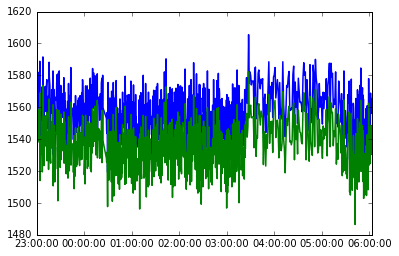

In [15]:
%%time
plt.plot(md.cycles.PR_BCT.HotspotIntensity.dcAftInj1[:,0],md.cycles.PR_BCT.HotspotIntensity.dcAftInj1[:,1])
plt.plot(md.cycles.PR_BCT.HotspotIntensity.dcBefEje1[:,0],md.cycles.PR_BCT.HotspotIntensity.dcBefEje1[:,1])

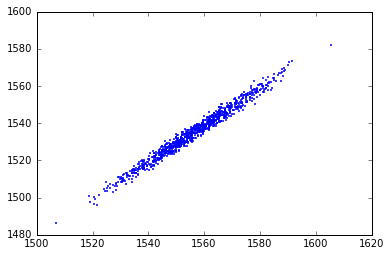

In [18]:
plt.plot(md.cycles.PR_BCT.HotspotIntensity.dcAftInj1[:,1],md.cycles.PR_BCT.HotspotIntensity.dcBefEje1[:,1], '.')

It is also possible to use `map`. However the implementation here is not very elegant.

CPU times: user 90.5 ms, sys: 9.72 ms, total: 100 ms
Wall time: 93.5 ms


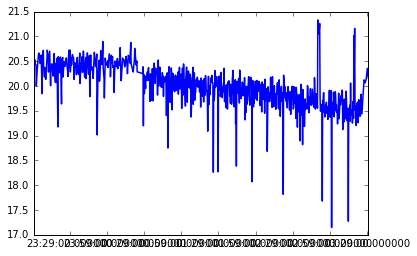

In [123]:
%%time
#md = vrl.MD('mte2015_optim', '1.0')
spills = md.parameters.F16_BCT126.Sampler.sampleData
trapping = np.array(list(map(lambda x: [x[0], trap(x[1], 59, 204, 3)], spills)))
plt.plot(trapping[:,0], trapping[:,1])

The following example shows a clean use-case for timeseries.

Averaging over 785 cycles
CPU times: user 44.1 ms, sys: 3.1 ms, total: 47.2 ms
Wall time: 45.6 ms


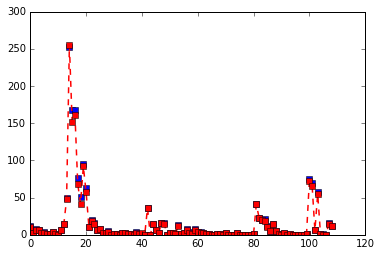

In [125]:
%%time
blms = md.parameters.CPS_BLM.Acquisition.lastLosses
print("Averaging over %d cycles" % len(blms))
plt.plot(np.mean([x[1] for x in blms], axis=0), 'bs', markersize=6)
plt.plot(np.median([x[1] for x in blms], axis=0), 'rs--', markersize=6)